本教程使用chili_wcs库进行简单的WCS校准
只需要调用WCSSolver.relative_solver()函数，并输入IFU和Guider的观测数据，以及猜测的IFU和Guider的视场中心坐标,就能完成IFU和Guider的相对位置定标。

In [1]:
from chili_wcs.wcs_solver import WCSSolver
from astropy.coordinates import SkyCoord
from astropy import units as u

# 1.Guider和IFU之间的相对位置定标
由于IFU在观测时，视场内没有足够的星点去解算恒星，因此我们需要借助导星相机来推断IFU的指向和WCS。\

但是这需要知道IFU和Guider之间的相对位置，因此我们需要进行相对位置定标。\
相对位置定标需要同时让IFU和Chili焦面Guider指向同一个天区观测。\

下面的程序 WCSSolver.relative_solver需要同时输入IFU和Chili焦面的Guider的观测数据，并输入猜测的IFU和Guider的视场中心坐标，用于解算的初始值。

程序会输出IFU和Guider的相对位置，并保存WCS结果到IWCS.fits文件中。 该文件里保存的相对位置关系参数，可以用来换算Guider和IFU之间的WCS参数。

注意:Chili有两个导星,一个是和IFU同焦面的导星(Chili Guider)，另一个是位于耐焦的额外的导星(Nasmyth Guider)， WCSSolver.relative_solver的 mode ="guider"时,会解算相对于Chili Guider的相对位置参数，而mode="nasmyth"时可用于解算Nasmyth Guider与IFU的相对位置关系

下一节的WCSSolver.all_relative_solver方法可以直接用于解算IFU相对于两个Guider的相对位置关系


Starting to solve guider WCS...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


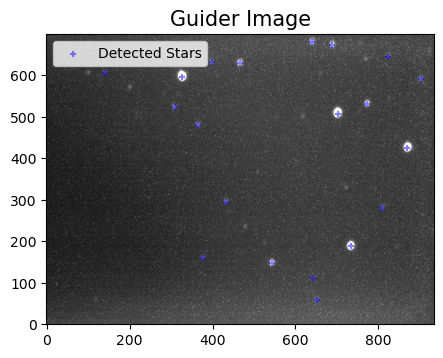

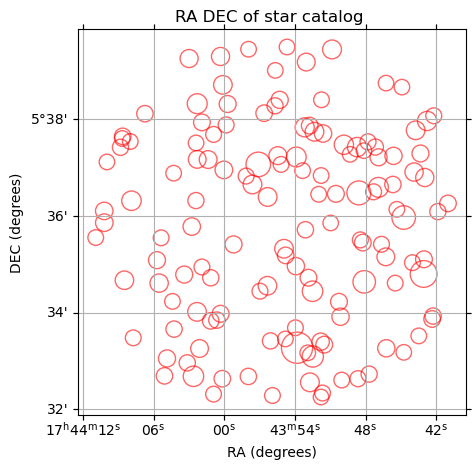

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:276.8080196561717
bestfit:[ 2.65977453e+02  5.59117333e+00 -1.84540207e-05  7.98125483e-05
  1.76882062e+02]
best_error:187.6596104457506
bestfit:[ 2.65958527e+02  5.61157291e+00 -4.63197614e-05  3.15770096e-16
  1.17960382e+02]
best_error:142.5149185285645
bestfit:[ 2.65974840e+02  5.61338418e+00 -8.06884440e-05  1.60814348e-05
  1.60427453e+02]
best_error:112.72461727485562
bestfit:[ 2.65973136e+02  5.58771603e+00 -8.46439109e-05  1.05953541e-04
  1.84536549e+02]
best_error:108.74721512293215
bestfit:[ 2.65972425e+02  5.58943737e+00 -8.83157338e-05  9.83201624e-05
  1.89564013e+02]
best_error:85.89401249749946
bestfit:[ 2.65962934e+02  5.61264603e+00 -5.49661692e-05  2.86045612e-05
  1.48279669e+02]
best_error:72.63779994747352
bestfit:[ 2.65961749e+02  5.594183

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


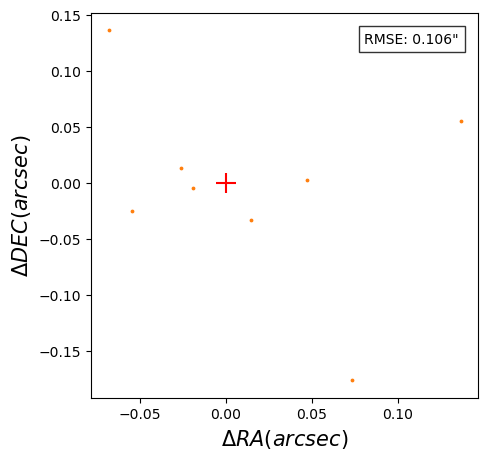

<Figure size 640x480 with 0 Axes>

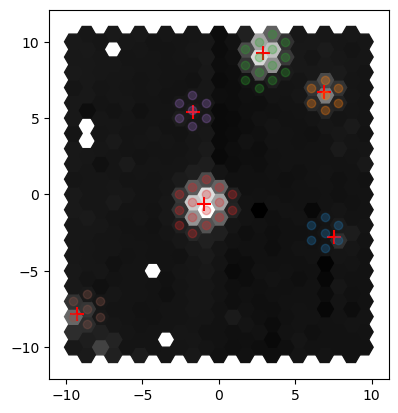

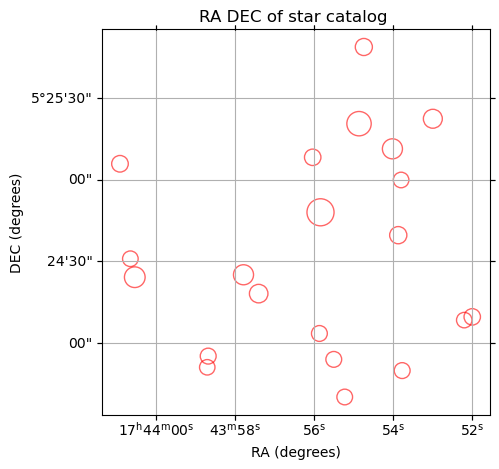

Found 6 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 6
2-4: Intermediate WCS fitting
Initial fitting parameters: [360, 89.82, 0, 0, 180]
best_error:14.278430957710132
bestfit:[ 3.60000000e+02  8.98198869e+01 -5.72830758e-04  1.09654830e-03
  1.63437154e+02]
best_error:0.1374588528639003
bestfit:[ 3.59889397e+02  8.98200968e+01 -9.26996116e-04  9.36097292e-04
  1.79144420e+02]
Best Fit WCS is [ 3.59889397e+02  8.98200968e+01 -9.26996116e-04  9.36097292e-04
  1.79144420e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 1), ('ICRPIX2', 1), ('ICRVAL1', 359.8893970452138), ('ICRVAL2', 89.8200967930934), ('ICD1_1', -0.0009269961158967236), ('ICD2_2', 0.0009360972919858266), ('ILONPOLE', 179.1444203340741)])
Fitted celestial coordinates: 
 [[265.97860278   5.42238891]
 [265.99078276   5.40699207]
 [265.97503012   5.41980967]
 [265.98268039   5.41331153]]
True celestial coordinates: 
 [[265.97858577   5.42237465]
 [265.99079828  

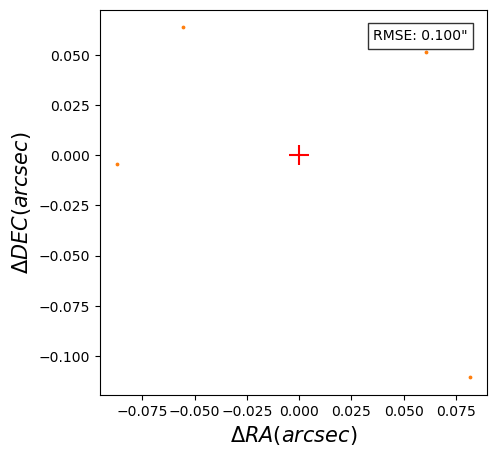

In [2]:

# 请将数据保存到自己的路径下，修改下面的路径，我提供了一组mock数据
guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results"  # 保存WCS结果的路径

# guider和ifu的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")
c_ifu = SkyCoord("17:43:55.7813867 +05:24:48.016101",unit=(u.hourangle, u.deg), frame="icrs")

wcs_result = WCSSolver.relative_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    save_path=save_path,                    # 保存WCS结果的路径
    # Guider参数
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    # IFU参数
    ra_guess_ifu=c_ifu.ra.deg ,             # IFU视场中心RA初始猜测值(度)
    dec_guess_ifu=c_ifu.dec.deg,            # IFU视场中心Dec初始猜测值(度)
    n_pixs_ifu=4,                           # 用于IFU匹配的像素坐标数
    n_stars_ifu=10,                          # 用于IFU匹配的星表星数
    backparam={'background':True,'k':0.2,'ndex':12}, # IFU背景拟合参数
    match_radius_ifu=0.1,                   # IFU三角形匹配半径
    target_err_ifu=1.8,                     # IFU目标误差阈值(角秒)
    min_data_points_ifu=3,                  # IFU最少匹配点数要求
    mode="guider",                          # 使用chili焦面导星模式
    plot=True                               # 显示结果图
)


# 1-2 IFU 与 chili焦面导星与耐焦导星的相对位置定标
WCSSolver.all_relative_solver方法可以一句话直接用于解算IFU相对于两个Guider的相对位置关系，输入两个guider数据的路径,和IFU的RSS文件的路径，基于三者猜测的初始中心指向坐标。就能将解算结果保存在IWCS.fits里，其中HDU1保存的是相对于Chili Guider 的相对位置参数， HDU2里保存的是相对于Nasmyth Guider的相对位置参数。


Solving WCS for both guider and nasmyth modes...

=== SOLVING GUIDER MODE ===

Starting to solve guider WCS...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


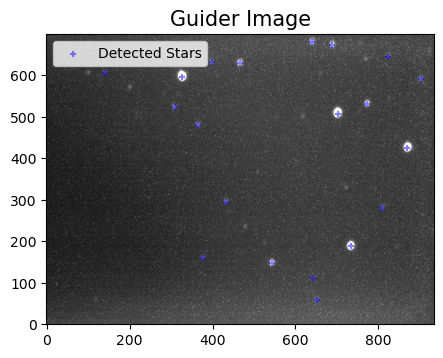

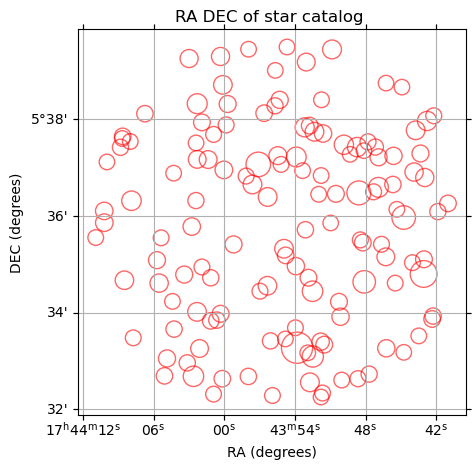

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:243.8292047108487
bestfit:[ 2.65956387e+02  5.58599611e+00 -4.91447265e-05  1.01725034e-04
  2.30247761e+02]
best_error:150.34112766994247
bestfit:[ 2.66002745e+02  5.58750571e+00 -1.69371558e-04  6.95520960e-05
  1.96860551e+02]
best_error:100.83466468654915
bestfit:[ 2.65970511e+02  5.60184016e+00 -6.07220113e-05  2.54003572e-05
  1.97791683e+02]
best_error:0.13619229713305234
bestfit:[ 2.65975476e+02  5.59366850e+00 -9.56338930e-05  9.57225704e-05
  1.77910929e+02]
Best Fit WCS is [ 2.65975476e+02  5.59366850e+00 -9.56338930e-05  9.57225704e-05
  1.77910929e+02]
Fitted WCS parameters:
OrderedDict([('GCRPIX1', 467.5), ('GCRPIX2', 350.5), ('GCRVAL1', 265.97547617617033), ('GCRVAL2', 5.593668495288726), ('GCD1_1', -9.563389300060696e-05), ('GCD2_2', 9.572257042797

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


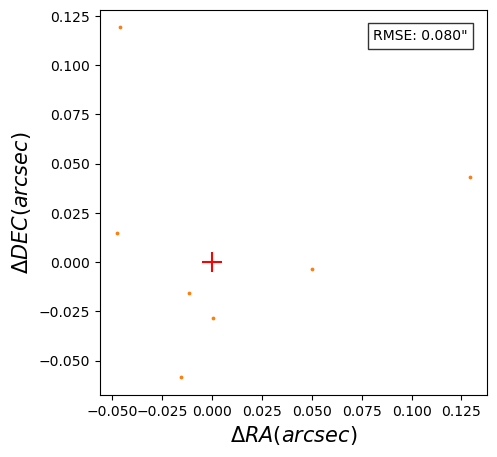

<Figure size 640x480 with 0 Axes>

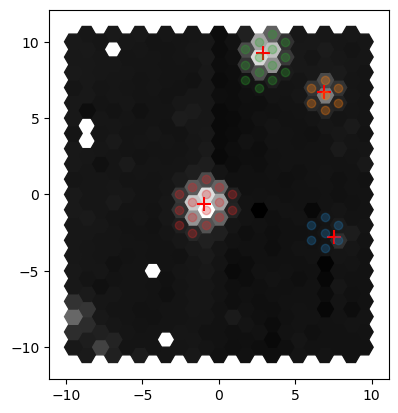

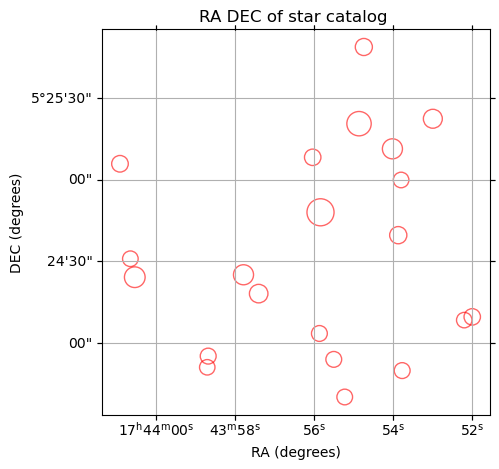

Found 4 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 4
2-4: Intermediate WCS fitting
Initial fitting parameters: [360, 89.82, 0, 0, 180]
best_error:0.5366572541806548
bestfit:[ 3.59883703e+02  8.98200821e+01 -9.53783449e-04  9.27731270e-04
  1.80279151e+02]
Best Fit WCS is [ 3.59883703e+02  8.98200821e+01 -9.53783449e-04  9.27731270e-04
  1.80279151e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 1), ('ICRPIX2', 1), ('ICRVAL1', 359.883703373188), ('ICRVAL2', 89.82008208450642), ('ICD1_1', -0.0009537834493124884), ('ICD2_2', 0.0009277312700429875), ('ILONPOLE', 180.27915050642784)])
Fitted celestial coordinates: 
 [[265.97454102   5.41105644]
 [265.978644     5.4223473 ]
 [265.97491247   5.4198585 ]
 [265.98263927   5.41327589]]
True celestial coordinates: 
 [[265.97443898   5.41101032]
 [265.97858577   5.42237465]
 [265.97505438   5.41981091]
 [265.98265762   5.41334226]]
Fitting residuals (arcsec): 
 [[ 0.36731633  0.1

/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 6 of "distance overridden (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


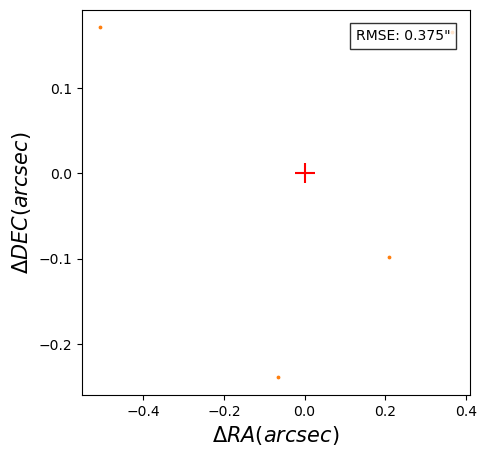

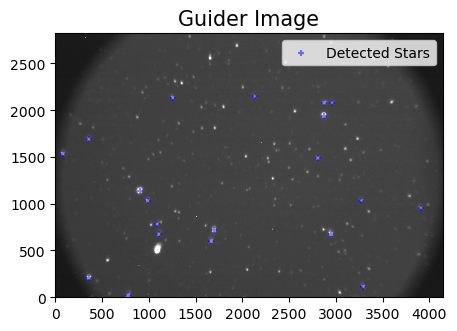

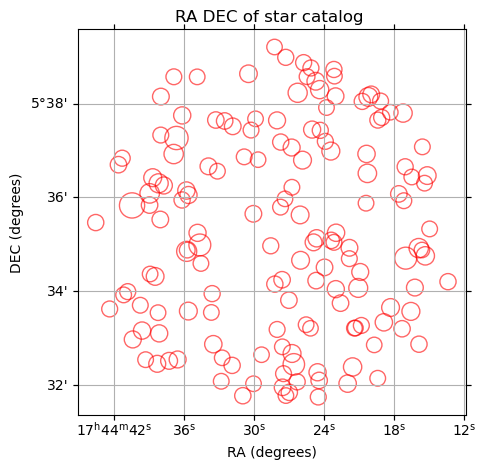

Found 20 stars in the image
Found 153 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 39
1-4: WCS fitting
Initial fitting parameters: [266.11783878, 5.589913369444444, 0, 0, 180]
best_error:104.24722495911077
bestfit:[ 2.66112525e+02  5.58733090e+00 -3.38036768e-05  3.86968308e-05
  1.29687191e+02]
best_error:65.38605413368363
bestfit:[ 2.66159070e+02  5.60545690e+00 -2.20512302e-06  1.13936339e-05
  1.96972261e+02]
best_error:62.719490714095976
bestfit:[ 2.66157911e+02  5.60025258e+00 -4.84854924e-06  4.73349094e-18
  1.20121000e+02]
best_error:62.71881864598015
bestfit:[ 2.66157912e+02  5.60025234e+00 -4.84854954e-06  1.54680654e-18
  1.20105943e+02]
best_error:48.22601137353683
bestfit:[ 2.66154572e+02  5.59787316e+00 -9.13496896e-06  1.21582160e-05
  6.79565870e+01]
best_error:13.91346637026081
bestfit:[ 2.66112758e+02  5.58821472e+00 -4.29788698e-05  3.83648422e-05
  1.29929607e+02]
best_error:0.19217807770997228
bestfit:[ 2.66110831e+02  5.59006568e

/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


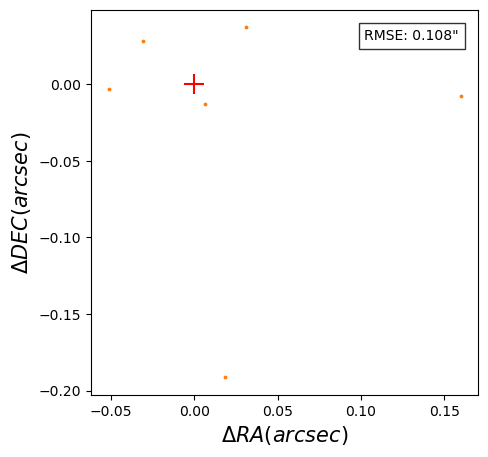

<Figure size 640x480 with 0 Axes>

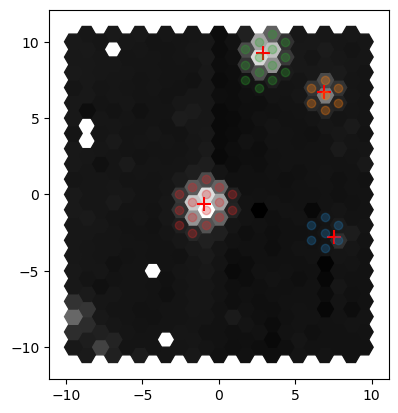

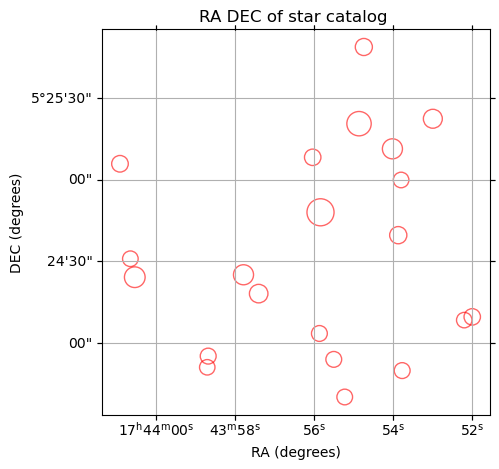

Found 4 stars in the image
Found 21 catalog stars in the field
2-3: Triangle matching
Number of matched triangles: 4
2-4: Intermediate WCS fitting
Initial fitting parameters: [305.4, 89.787, 0, 0, 144.6]
best_error:0.5366115300409804
bestfit:[ 2.73906878e+02  8.97818910e+01 -9.53784535e-04  9.27730924e-04
  1.42203993e+02]
best_error:0.5366111017836646
bestfit:[ 2.73906878e+02  8.97818910e+01 -9.53784370e-04  9.27730759e-04
  1.42203981e+02]
Best Fit WCS is [ 2.73906878e+02  8.97818910e+01 -9.53784370e-04  9.27730759e-04
  1.42203981e+02]
Fitted WCS parameters:
OrderedDict([('ICRPIX1', 1), ('ICRPIX2', 1), ('ICRVAL1', 273.90687814153415), ('ICRVAL2', 89.78189101550889), ('ICD1_1', -0.0009537843699737097), ('ICD2_2', 0.0009277307588161684), ('ILONPOLE', 142.20398076284803)])
Fitted celestial coordinates: 
 [[265.97454098   5.41105647]
 [265.97864403   5.42234729]
 [265.97491249   5.41985851]
 [265.98263925   5.41327586]]
True celestial coordinates: 
 [[265.97443898   5.41101032]
 [265.97

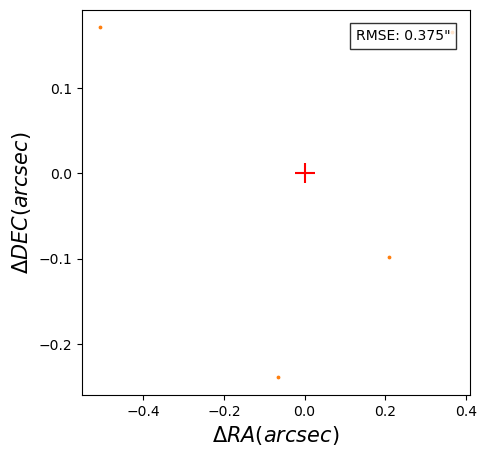

In [3]:
# 请将数据保存到自己的路径下，修改下面的路径

guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像路径
# 耐焦导星的路径
guider_nasmyth_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Nasmyth_Guider_kopff27.fits" 
# IFU的RSS数据的路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径

# 保存相对位置定标IWCS.fits结果的路径，也可以直接提供一个带名字的fits，比如"/yoursavepath/IWCS.fits"    
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results"  
# guider和ifu的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")
c_guider_nasmyth = SkyCoord("17:44:28.2813072 +05:35:23.688130", unit=(u.hourangle, u.deg), frame="icrs")
c_ifu = SkyCoord("17:43:55.7813867 +05:24:48.016101",unit=(u.hourangle, u.deg), frame="icrs")


wcs_result = WCSSolver.all_relative_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    nasmyth_guider_path=guider_nasmyth_path, # 耐焦导星图像路径
    save_path=save_path,                    # 保存WCS结果的路径
    # Guider参数
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    # 耐焦导星参数
    ra_guess_nasmyth_guider=c_guider_nasmyth.ra.deg, # 耐焦导星视场中心RA初始猜测值(度)
    dec_guess_nasmyth_guider=c_guider_nasmyth.dec.deg, # 耐焦导星视场中心Dec初始猜测值(度)
    n_pixs_nasmyth_guider=10,               # 用于耐焦导星匹配的像素坐标数
    n_stars_nasmyth_guider=15,              # 用于耐焦导星匹配的星表星数
    match_radius_nasmyth_guider=0.1,        # 耐焦导星三角形匹配半径
    target_err_nasmyth_guider=0.5,          # 耐焦导星目标误差阈值(角秒)
    min_data_points_nasmyth_guider=2,       # 耐焦导星最少匹配点数要求
    # IFU参数
    ra_guess_ifu=c_ifu.ra.deg ,      # IFU视场中心RA初始猜测值(度)
    dec_guess_ifu=c_ifu.dec.deg,    # IFU视场中心Dec初始猜测值(度)
    n_pixs_ifu=5,                           # 用于IFU匹配的像素坐标数
    n_stars_ifu=9,                          # 用于IFU匹配的星表星数
    backparam={'background':True,'k':0.3,'ndex':12}, # IFU背景拟合参数
    match_radius_ifu=0.1,                   # IFU三角形匹配半径
    target_err_ifu=2,                     # IFU目标误差阈值(角秒)
    min_data_points_ifu=4,                  # IFU最少匹配点数要求
    plot=True                               # 显示结果图
)

# 2.观测后利用Guider图像转换出IFS的WCS参数和指向
进行科学观测时，我们需要同时打开Guider进行图像拍摄，这样在数据处理的时候，可以解算Guider的WCS参数，然后利用相对位置关系IWCS.fits文件，转换出IFS的WCS参数和指向。


In [4]:
from chili_wcs.wcs_solver import WCSSolver
from astropy.coordinates import SkyCoord
from astropy import units as u


Loading IWCS reference file...

Loading IFU data...


/home/xiongyf/Code/Chili/chili_wcs/chili_wcs/load_data.py:117: RuntimeWarning: Mean of empty slice
  sum_fluxes[i] = np.nanmean(self.rss[i, 1020:1300])


Loading guider camera data...

Starting to solve guider WCS...
1-1: Loading guider image
1-2: Getting star pixel coordinates and sky coordinates


/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/equivalencies.py:100: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/xiongyf/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in pdp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:4998: RuntimeWarning: invalid value encountered in pmsafe
  ra2, dec2, pmr2, pmd2, px2, rv2, c_retval = ufunc.pmsafe(
/home/xiongyf/anaconda3/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "pmsafe" yielded 2 of "distance overridden (Note 6)", 1 of "binary logical OR of the above warnings"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


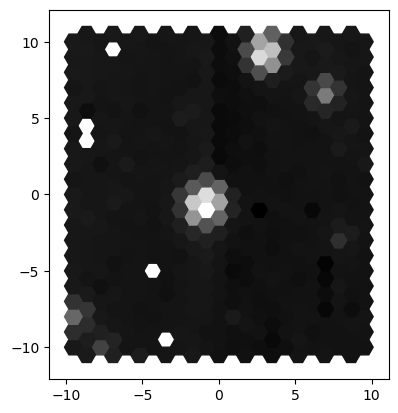

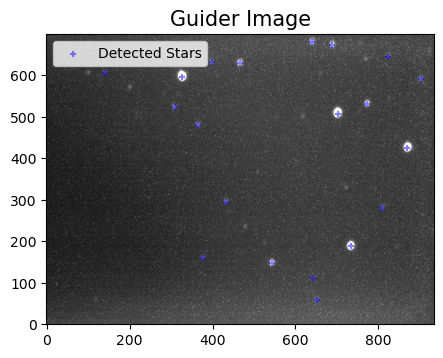

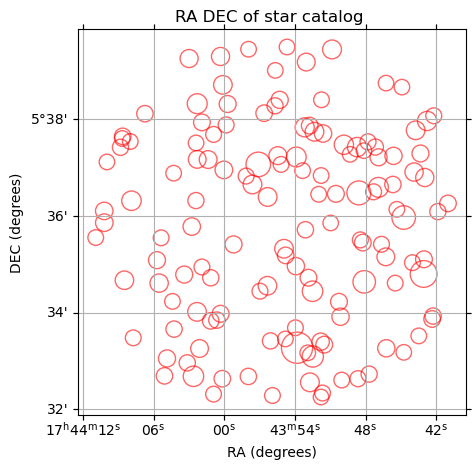

Found 20 stars in the image
Found 136 catalog stars in the field
1-3: Triangle matching
Number of matched triangles: 34
1-4: WCS fitting
Initial fitting parameters: [265.9797838641666, 5.597150969166666, 0, 0, 180]
best_error:246.59149578840888
bestfit:[ 2.66001544e+02  5.61715567e+00 -1.57183205e-04  1.55637140e-05
  1.42942519e+02]
best_error:228.54499136010836
bestfit:[ 2.65980939e+02  5.58398559e+00 -7.99330865e-05  9.40054596e-05
  1.95116509e+02]
best_error:108.74448596178947
bestfit:[ 2.65962493e+02  5.60401362e+00 -4.96997476e-05  4.46070710e-05
  1.64962011e+02]
best_error:58.08622263976629
bestfit:[ 2.65978916e+02  5.59150171e+00 -1.02927081e-04  9.66568246e-05
  1.85322874e+02]
best_error:0.07841273437198522
bestfit:[ 2.65975459e+02  5.59366583e+00 -9.55798481e-05  9.57567178e-05
  1.77915695e+02]
Best Fit WCS is [ 2.65975459e+02  5.59366583e+00 -9.55798481e-05  9.57567178e-05
  1.77915695e+02]
Fitted WCS parameters:
OrderedDict([('GCRPIX1', 467.5), ('GCRPIX2', 350.5), ('GCR

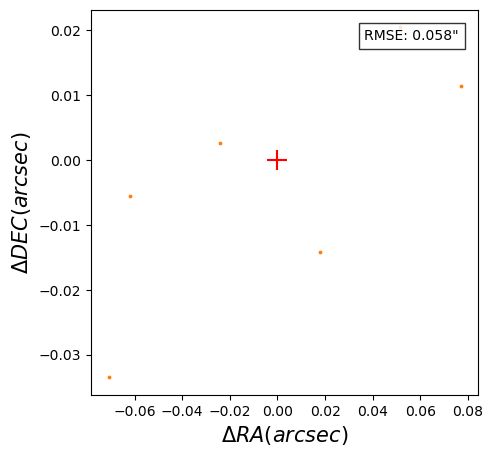

In [5]:
# 下面的程序需要输入Guider的观测数据和IWCS.fits文件，并输入猜测的Guider的视场中心坐标，用于解算的初始值。
# 程序会输出IFU的WCS参数，并保存到新的FITS文件中。

# 设置参数
guider_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/Chili_Guider_kopff27.fits"  # Guider图像
iwcs_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IWCS_20250417.fits"  # IWCS文件路径
ifu_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/calibration_data/IFU_RSS_kopff27.fits"  # IFU图像路径
save_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results"  # 保存WCS结果的路径

# guider的视场中心坐标猜测值,用于解算的初始值，可以肉眼简单对比一下aladin里的图像后猜测，或者使用astrometry.net进行解算后获得
c_guider = SkyCoord("17:43:55.1481274 +05:35:49.743489",unit=(u.hourangle, u.deg), frame="icrs")

wcs_result = WCSSolver.ifu_solver(
    guider_path=guider_path,                # Guider图像路径
    ifu_path=ifu_path,                      # IFU图像路径
    iwcs_path=iwcs_path,                    # IWCS文件路径
    save_path=save_path,                    # 保存WCS结果的路径
    ra_guess_guider=c_guider.ra.deg,        # Guider视场中心RA初始猜测值(度)
    dec_guess_guider=c_guider.dec.deg,      # Guider视场中心Dec初始猜测值(度)
    n_pixs_guider=8,                        # 用于Guider匹配的像素坐标数
    n_stars_guider=15,                      # 用于Guider匹配的星表星数
    match_radius_guider=0.05,               # Guider三角形匹配半径
    target_err_guider=0.2,                  # Guider目标误差阈值(角秒)
    min_data_points_guider=5,               # Guider最少匹配点数要求
    mode = "guider",                        # 使用chili焦面导星解算后换算IFU的WCS，如果是耐焦导星，则使用mode="nasmyth"
    plot=True                               # 显示结果图
)


In [ ]:
print(wcs_result)

# 读取天体测量定标后的IFU数据，并绘图
该数据中hdu1保存了原始的rss数据，hdu2保存了每个spaxel对应的几何坐标和天球坐标，可以用来绘制光纤阵列在天空中的位置。

In [8]:
from astropy.io import fits
# 读取mock_RSS_radec.fits文件
file_path = "/home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IFU_RSS_kopff27_radec.fits"
hdul = fits.open(file_path)
# 打印文件信息
hdul.info()
# 读取RADEC表数据
radec_data = hdul['RADEC'].data
# 打印RADEC表的前几行数据
print(radec_data)
# 关闭文件
hdul.close()
print(hdul["RADEC"].header)


Filename: /home/xiongyf/Code/Chili/chili_wcs/example/example_data/results/IFU_RSS_kopff27_radec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  RSS           1 ImageHDU        23   (2064, 494)   float64   
  2  RADEC         1 BinTableHDU     36   494R x 6C   [K, D, D, D, D, D]   
[(  0, -3.71535714e+01,  9.52627944, -10. , 265.97281707, 5.40431296)
 (  1, -3.66607143e+01,  9.52627944,  -9. , 265.9727896 , 5.40524029)
 (  2, -3.60035714e+01,  9.52627944,  -8. , 265.97276214, 5.40616762)
 (  3, -3.77214286e+01,  9.52627944,  -7. , 265.97273467, 5.40709495)
 (  4, -3.78428571e+01,  9.52627944,  -6. , 265.9727072 , 5.40802228)
 (  5, -3.75035714e+01,  9.52627944,  -5. , 265.97267973, 5.4089496 )
 (  6, -3.77964286e+01,  9.52627944,  -4. , 265.97265226, 5.40987693)
 (  7, -3.70464286e+01,  9.52627944,  -3. , 265.97262479, 5.41080426)
 (  8, -3.56142857e+01,  9.52627944,  -2. , 265.97259733, 5.41173159)
 (  9, -3.692

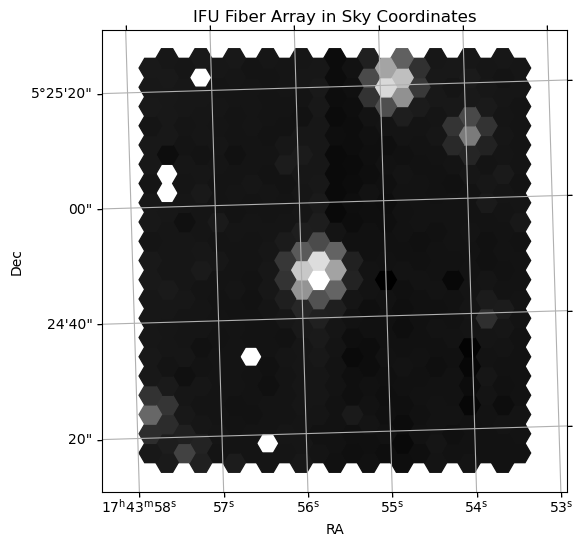

In [9]:
from astropy.wcs import WCS
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize


sum_fluxes = radec_data['SUM_FLUXES']   
ra_fiber = radec_data['RA_FIBER']
dec_fiber = radec_data['DEC_FIBER']
x_fiber = radec_data['X_FIBER']
y_fiber = radec_data['Y_FIBER']

wcs = WCS(header = hdul['RADEC'].header)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=wcs)

# 设置colormap和归一化
cmap = cm.get_cmap('gray')
stretch = AsinhStretch(0.01)
norm = ImageNormalize(vmin=min(sum_fluxes), vmax=max(sum_fluxes), stretch=stretch)
zcolor = cmap(norm(sum_fluxes))
# 绘制每个光纤的六边形
for i in range(len(x_fiber)):
    hexagon = RegularPolygon((x_fiber[i], y_fiber[i]), 
                            numVertices=6,
                            radius=0.5/np.cos(np.pi/6),
                            orientation=np.pi/2,
                            color=zcolor[i])
    ax.add_patch(hexagon)

plt.xlim(-12,12)
plt.ylim(-12,12)
# 设置坐标轴标签
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
plt.title('IFU Fiber Array in Sky Coordinates')
ax.grid(True)
plt.show()